#Практическая работа №1
##Предварительная обработка данных
Выполнила Фонград Анастасия Андреевна КИ21-16/1б
##Цель работы
Знакомство с основными задачами предварительной обработки исходных данных, изучение основных методов предварительной обработки данных формирование навыков выполнения предварительной обработки исходных данных с помощью языка программирования Python.
##Задачи
Выполнение практической работы предполагает решение следующий задач:
1. Визуальный анализ исходных данных
2. Поиск аномальных значений
3. Поиск и восстановление отсутствующих значений
4. Преобразование данных


In [45]:
import pandas as pd
import numpy as np
import sklearn.impute
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from scipy.stats import sigmaclip
from plot_graph import *

Был произведён импорт данных из .xlsx файла

In [46]:
data = pd.read_excel("C:\\Users\\fongr\\Documents\\Мои документы\\Второй курс\\python\\scientificProject\\data\\first_practice_dataframe.xlsx", sheet_name="Sheet1")
PROFICIENCY_LEVEL = "cat10_proficiencyLevel"
AGE = "cat9_age"
NUM_1 = "num1_24"
NUM_2 = "num2_24"
NUM_3 = "num3_24"
headers = [PROFICIENCY_LEVEL, AGE, NUM_1, NUM_2, NUM_3]
frame = pd.DataFrame(data[headers])
print(frame)

    cat10_proficiencyLevel            cat9_age      num1_24      num2_24  \
0                 Advanced      below 21 years   907.348256   242.734013   
1                   Novice  59 years and above   962.219776  1035.400665   
2                   Novice  59 years and above  1053.680910  -469.064161   
3                 Advanced  59 years and above  1148.702980  2793.294228   
4                 Advanced  59 years and above  1018.119147  -954.043533   
..                     ...                 ...          ...          ...   
995               Advanced      below 21 years   815.379375  -154.418945   
996                 novice  59 years and above  1195.478914  -572.061291   
997                 Novice      21 to 35 years   762.115010  -596.334731   
998                 Novice  59 years and above   730.372126 -1101.408593   
999               Advanced      36 to 58 years  1015.521911   838.290002   

        num3_24  
0    971.167308  
1    933.449443  
2    950.209325  
3    942.957073

##Визуальный анализ данных
Были построены несколько видов графиков для каждого из столбцов таблицы

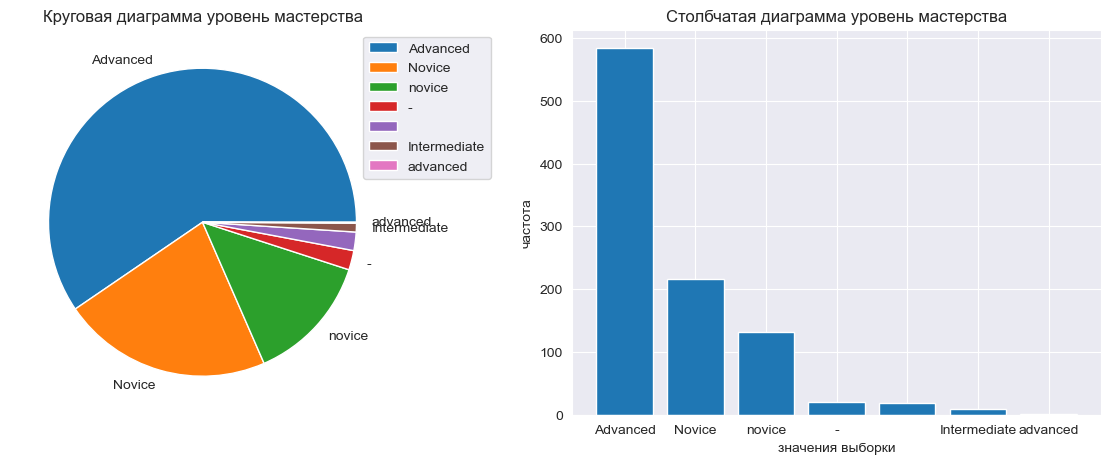

In [47]:
build_category_graf(frame, PROFICIENCY_LEVEL, "уровень мастерства")

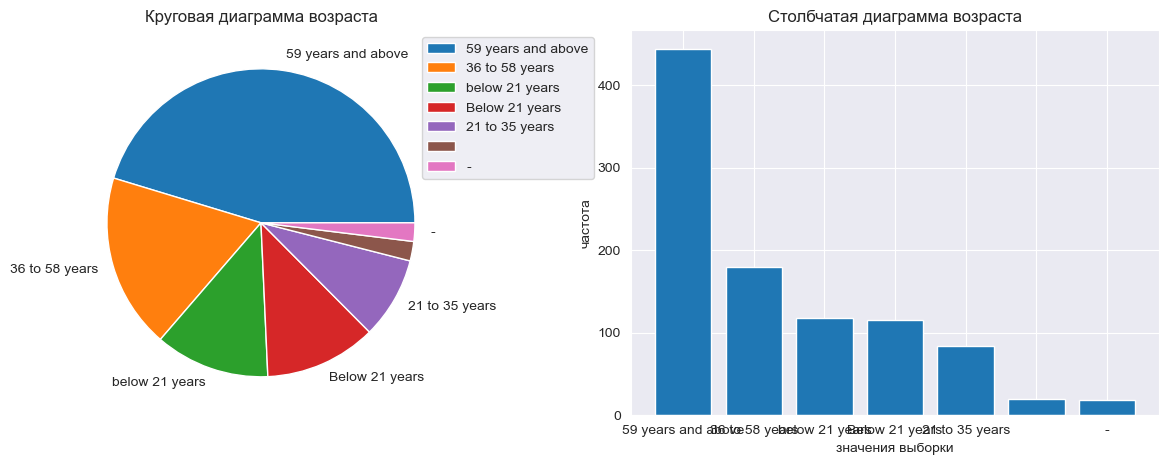

In [48]:
build_category_graf(frame, AGE, "возраста")

Для построения графиков числовых параметров из них были временно удалены пустые значения. Это позволило избежать ошибок при построении

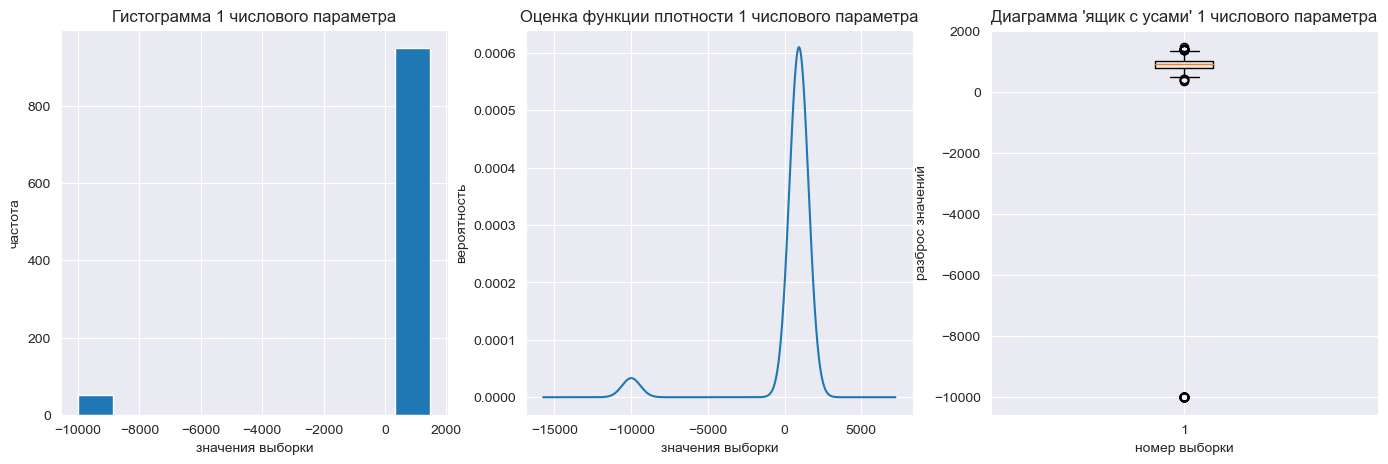

In [49]:
build_numeric_graph(frame, NUM_1, "1 числового параметра")

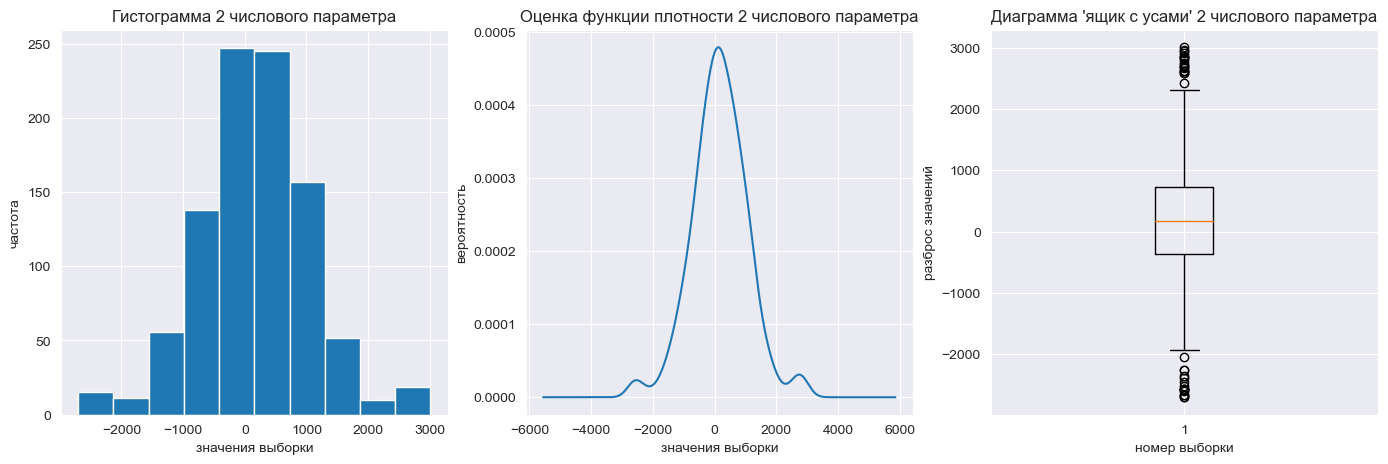

In [50]:
build_numeric_graph(frame, NUM_2, "2 числового параметра")

In [51]:
frame[NUM_3].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: num3_24
Non-Null Count  Dtype 
--------------  ----- 
972 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


##Поиск аномальных значений
По графикам видно, что некоторые из значений таблицы являются некорректными. Наблюдаются пропуски значений, выбросы, ошибки в именах категорий. Метод info() показывает, что 3 из 5 колонок имеют неверный тип

In [52]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cat10_proficiencyLevel  981 non-null    object 
 1   cat9_age                980 non-null    object 
 2   num1_24                 1000 non-null   float64
 3   num2_24                 950 non-null    float64
 4   num3_24                 972 non-null    object 
dtypes: float64(2), object(3)
memory usage: 39.2+ KB


###Изменение качественных признаков

Всем пустым значениям был присвоен тип None. Первая буква всех названий категорий была заменена на прописную

In [53]:
frame.loc[frame[PROFICIENCY_LEVEL]=='-', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]=='', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]==' ', PROFICIENCY_LEVEL] = np.nan
frame.loc[frame[PROFICIENCY_LEVEL]=='novice', PROFICIENCY_LEVEL] = "Novice"
frame.loc[frame[PROFICIENCY_LEVEL]=='advanced', PROFICIENCY_LEVEL] = "Advanced"
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].fillna(np.nan)
frame[PROFICIENCY_LEVEL].unique()

array(['Advanced', 'Novice', nan, 'Intermediate'], dtype=object)

In [54]:
frame.loc[frame[AGE]=='-', AGE] = np.nan
frame.loc[frame[AGE]=='', AGE] = np.nan
frame.loc[frame[AGE]==' ', AGE] = np.nan
frame.loc[frame[AGE]=='below 21 years', AGE] = "Below 21 years"
frame[AGE] = frame[AGE].fillna(np.nan)
frame[AGE].unique()

array(['Below 21 years', '59 years and above', '21 to 35 years',
       '36 to 58 years', nan], dtype=object)

Первая и вторая колонки были приведены к категориальному типу

In [55]:
frame[AGE] = frame[AGE].astype("category")
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].astype("category")

###Изменение количественных признаков
Пустые значения 3 числового признака были заменены на значение NaN.

In [56]:
frame.loc[frame[NUM_3]=='-', NUM_3] = float('nan')
frame.loc[frame[NUM_3]=='', NUM_3] = float('nan')
frame.loc[frame[NUM_3]==' ', NUM_3] = float('nan')
frame[NUM_3] = frame[NUM_3].fillna(np.NaN)

Для обновлённого последнего столбца был построен ряд графиков

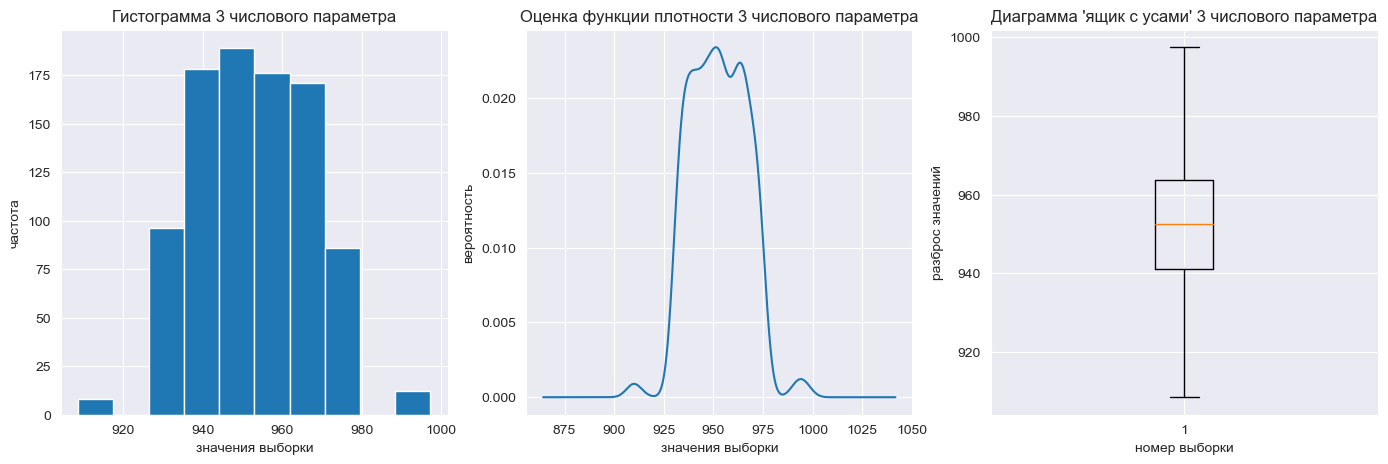

In [57]:
build_numeric_graph(frame, NUM_3, "3 числового параметра")

Теперь все качественные признаки имеют тип category, а все количественные - float64

In [58]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   cat10_proficiencyLevel  942 non-null    category
 1   cat9_age                941 non-null    category
 2   num1_24                 1000 non-null   float64 
 3   num2_24                 950 non-null    float64 
 4   num3_24                 916 non-null    float64 
dtypes: category(2), float64(3)
memory usage: 25.8 KB


##Поиск и восстановление пропущенных значений
###Метод k ближайших соседей
Пропуски в третьем количественном признаке были заменены на значения, полученные методом ближайших соседей

In [59]:
df_copy = frame.copy()          # копируем датафрейм, чтоб сохранить значение колонок до заполнения
knn_inputer = sklearn.impute.KNNImputer()
inputed_df = knn_inputer.fit_transform(df_copy[[NUM_1, NUM_2, NUM_3]])
frame[NUM_3] = inputed_df[:, 2]
frame

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
3,Advanced,59 years and above,1148.702980,2793.294228,942.957073
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


Для устранения пропусков в первом качественном признаке методом k ближайших соседей, их значения были приведены к целочисленным кодам

In [60]:
frame[PROFICIENCY_LEVEL].value_counts()

Advanced        585
Novice          348
Intermediate      9
Name: cat10_proficiencyLevel, dtype: int64

Присвоим значениям первого категориального признака числовые коды

In [61]:
le = LabelEncoder()
frame[PROFICIENCY_LEVEL] = le.fit_transform(frame[PROFICIENCY_LEVEL])
frame[PROFICIENCY_LEVEL].value_counts()

0    585
2    348
3     58
1      9
Name: cat10_proficiencyLevel, dtype: int64

По выводу value_counts видно, что значениям None был присвоен числовой код 3. Вернём их в None и заполним методом k ближайших соседей.

In [62]:
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].replace({3: None})
df_copy = frame.copy()
knn_inputer = sklearn.impute.KNNImputer()
inputed_df = knn_inputer.fit_transform(df_copy[[PROFICIENCY_LEVEL, NUM_1, NUM_2, NUM_3]])
frame[PROFICIENCY_LEVEL] = inputed_df[:, 0]
frame[PROFICIENCY_LEVEL] = frame[PROFICIENCY_LEVEL].apply(
    lambda x: round(x) # Округляем значения до целого числа
)
print(frame[PROFICIENCY_LEVEL].value_counts())
frame[PROFICIENCY_LEVEL]

0    599
2    355
1     46
Name: cat10_proficiencyLevel, dtype: int64


0      0
1      2
2      2
3      0
4      0
      ..
995    0
996    2
997    2
998    2
999    0
Name: cat10_proficiencyLevel, Length: 1000, dtype: int64

Для обратного кодирования можно воспользоваться методом inverse_transform

In [63]:
frame[PROFICIENCY_LEVEL] = le.inverse_transform(frame[PROFICIENCY_LEVEL])
frame[PROFICIENCY_LEVEL].value_counts()

Advanced        599
Novice          355
Intermediate     46
Name: cat10_proficiencyLevel, dtype: int64

Пропуски в 1 и 2 количественных признаках были заполнены средним и медианным значениями соответственно

In [64]:
median = frame[NUM_2].median()
average = frame[NUM_1].mean()
frame[NUM_1] = frame[NUM_1].fillna(average)
frame[NUM_2] = frame[NUM_2].fillna(median)

Пропуски значений второго признака были заполнены самым популярным значением

In [65]:
print(frame[AGE].value_counts())
frame[AGE] = frame[AGE].fillna("59 years and above")

59 years and above    444
Below 21 years        233
36 to 58 years        180
21 to 35 years         84
Name: cat9_age, dtype: int64


##Удаление аномальных значений
Были сделаны 3 копии исходного фрейма

In [66]:
frame_copy = frame.copy()
frame_quantile = frame.copy()
frame_sigma = frame.copy()

###Поиск аномальных значений методом сигм
Были найдены выбросы значений для 1 числового параметра. Строки, содержащие выбросы, были удалены из фрейма.

In [67]:
_, low, upp = sigmaclip(frame_sigma[NUM_1], 3, 3)
dropped_values = frame_sigma[NUM_1][(frame_sigma[NUM_1] < low) | (frame_sigma[NUM_1] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index, axis=0)

Аналогичным способом были удалены выбросы для 2 и 3 параметров. Функция sigmaclip не работает корректно со значениями типа nan. Поэтому пришлось заменить их нулями

In [68]:
_, low, upp = sigmaclip(frame_sigma[NUM_2], 3, 3)
dropped_values = frame_sigma[NUM_2][(frame_sigma[NUM_2] < low) | (frame_sigma[NUM_2] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index)
_, low, upp = sigmaclip(frame_sigma[NUM_3], 3, 3)
dropped_values = frame_sigma[NUM_3][(frame_sigma[NUM_3] < low) | (frame_sigma[NUM_3] > upp)]
frame_sigma = frame_sigma.drop(dropped_values.index)
frame_sigma

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
5,Novice,59 years and above,781.003970,-406.560281,948.073989
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


###Поиск аномальных значений методом квантилей

In [69]:
def outlier_estimation(data_frame, column):
    q25 = data_frame[column].quantile(0.25)
    q75 = data_frame[column].quantile(0.75)
    delta = q75 - q25
    inside_border = [(q25 - 1.5 * delta), (q75 + 1.5 * delta)] # Незначительный выброс
    outside_border = [(q25 - 3 * delta), (q75 + 3 * delta)] # Значительный выброс
    return inside_border

In [70]:
low, high = outlier_estimation(frame_quantile, NUM_1)
dropped_values = frame_quantile[NUM_1][(frame_quantile[NUM_1] < low) | (frame_quantile[NUM_1] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)

In [71]:
low, high = outlier_estimation(frame_quantile, NUM_2)
dropped_values = frame_quantile[NUM_2][(frame_quantile[NUM_2] < low) | (frame_quantile[NUM_2] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)
low, high = outlier_estimation(frame_quantile, NUM_3)
dropped_values = frame_quantile[NUM_3][(frame_quantile[NUM_3] < low) | (frame_quantile[NUM_3] > high)]
frame_quantile = frame_quantile.drop(dropped_values.index)
frame_quantile

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24
0,Advanced,Below 21 years,907.348256,242.734013,971.167308
1,Novice,59 years and above,962.219776,1035.400665,933.449443
2,Novice,59 years and above,1053.680910,-469.064161,950.209325
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814
5,Novice,59 years and above,781.003970,-406.560281,948.073989
...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375
996,Novice,59 years and above,1195.478914,-572.061291,954.136037
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237
998,Novice,59 years and above,730.372126,-1101.408593,953.369459


Использование метода сигм позволило удалить 115 значения из фрейма, а метода квантилей - 111 значений. Метод сигм оказался немного более сильным.

In [72]:
frame = frame_sigma

Ниже представлены гистограммы колонок очищенного от выбросов распределения

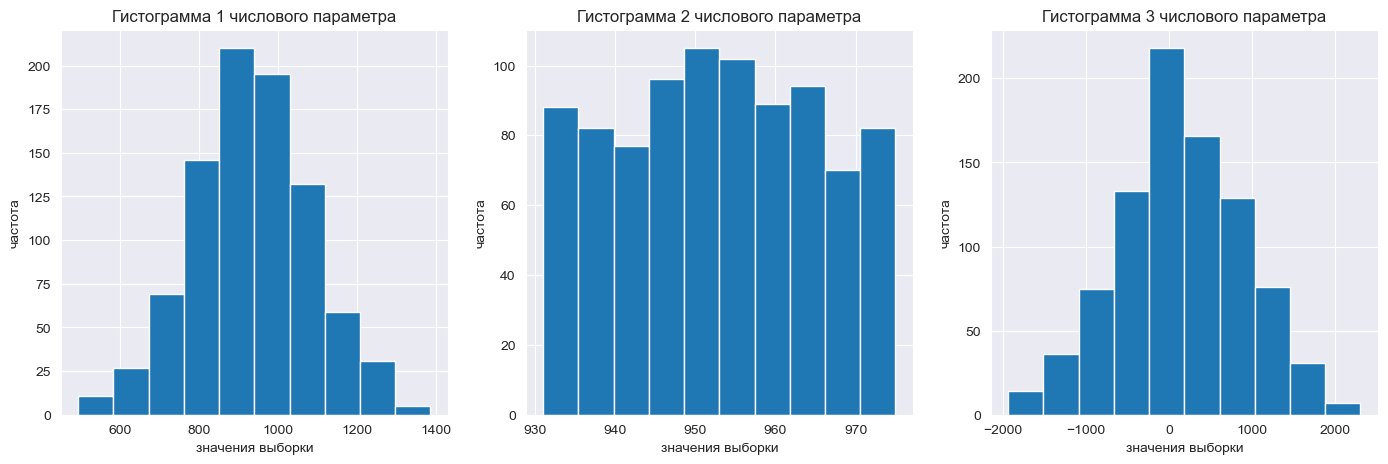

In [73]:
build_three_hists(frame, NUM_1, NUM_2, NUM_3)

##Преобразование данных
###Кодировка категориальных признаков
Первый категориальный признак был закодирован с помощью one-hot encoding

In [74]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(frame[[PROFICIENCY_LEVEL]]).toarray(), columns=frame[PROFICIENCY_LEVEL].unique())
frame = frame.join(enc_df)
frame

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24,Advanced,Novice,Intermediate
0,Advanced,Below 21 years,907.348256,242.734013,971.167308,1.0,0.0,0.0
1,Novice,59 years and above,962.219776,1035.400665,933.449443,0.0,0.0,1.0
2,Novice,59 years and above,1053.680910,-469.064161,950.209325,0.0,0.0,1.0
4,Advanced,59 years and above,1018.119147,-954.043533,947.163814,0.0,0.0,1.0
5,Novice,59 years and above,781.003970,-406.560281,948.073989,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
995,Advanced,Below 21 years,815.379375,-154.418945,961.201375,NaN,NaN,NaN
996,Novice,59 years and above,1195.478914,-572.061291,954.136037,NaN,NaN,NaN
997,Novice,21 to 35 years,762.115010,-596.334731,955.746237,NaN,NaN,NaN
998,Novice,59 years and above,730.372126,-1101.408593,953.369459,NaN,NaN,NaN


Второй категориальный признак был закодирован с помощью label encoding

In [75]:
frame[AGE] = le.fit_transform(frame[AGE])
frame[AGE].value_counts()

2    445
3    211
1    158
0     71
Name: cat9_age, dtype: int64

###Преобразование количественных признаков
Нормализованный набор данных всегда будет иметь значения в диапазоне от 0 до 1.
Стандартизированный набор данных будет иметь среднее значение 0 и стандартное отклонение 1
Первый количественный признак был приведён к нормализованному виду

In [76]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(frame[[NUM_1]])
frame["num_1_scaled"] = scaled_values

Второй и третий количественные признаки были приведены к стандартизованному виду

In [77]:
scaler_std = StandardScaler()
scaled_values = scaler_std.fit_transform(frame[[NUM_2, NUM_3]])
frame[["num_2_scaled", "num_3_scaled"]] = scaled_values
frame.head(5)

,cat10_proficiencyLevel,cat9_age,num1_24,num2_24,num3_24,Advanced,Novice,Intermediate,num_1_scaled,num_2_scaled,num_3_scaled
0,Advanced,3,907.348256,242.734013,971.167308,1.0,0.0,0.0,0.463016,0.111108,1.491350
1,Novice,2,962.219776,1035.400665,933.449443,0.0,0.0,1.0,0.524437,1.168526,-1.574341
2,Novice,2,1053.680910,-469.064161,950.209325,0.0,0.0,1.0,0.626815,-0.838433,-0.212105
4,Advanced,2,1018.119147,-954.043533,947.163814,0.0,0.0,1.0,0.587009,-1.485396,-0.459643
5,Novice,2,781.003970,-406.560281,948.073989,1.0,0.0,0.0,0.321591,-0.755052,-0.385665


##Выводы
В процессе работы была произведена первичная обработка исходных данных. Было произведено извлечение из фрейма аномальных значений, пропуски в данных были заполнены, все столбцы приведены к стандартизированному виду.
Ниже представлено сравнение исходных и итоговых графиков

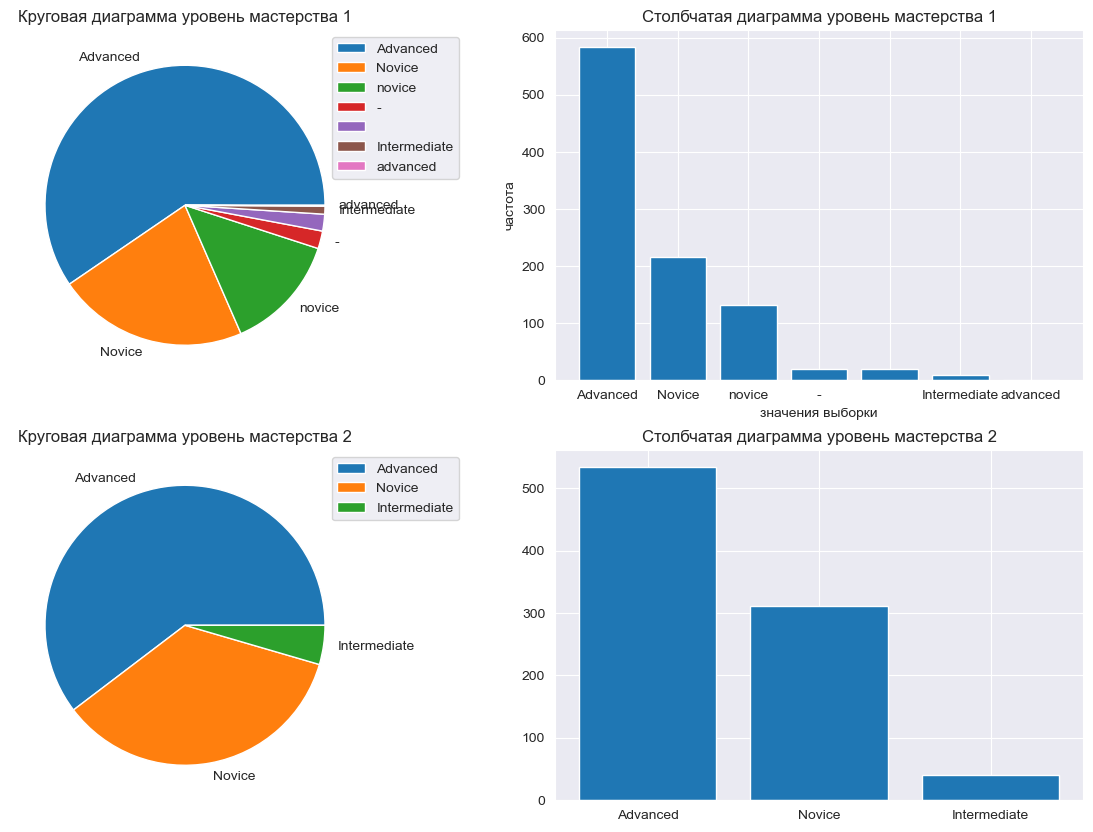

In [78]:
compare_category_graf(data, frame, PROFICIENCY_LEVEL, PROFICIENCY_LEVEL, "уровень мастерства")

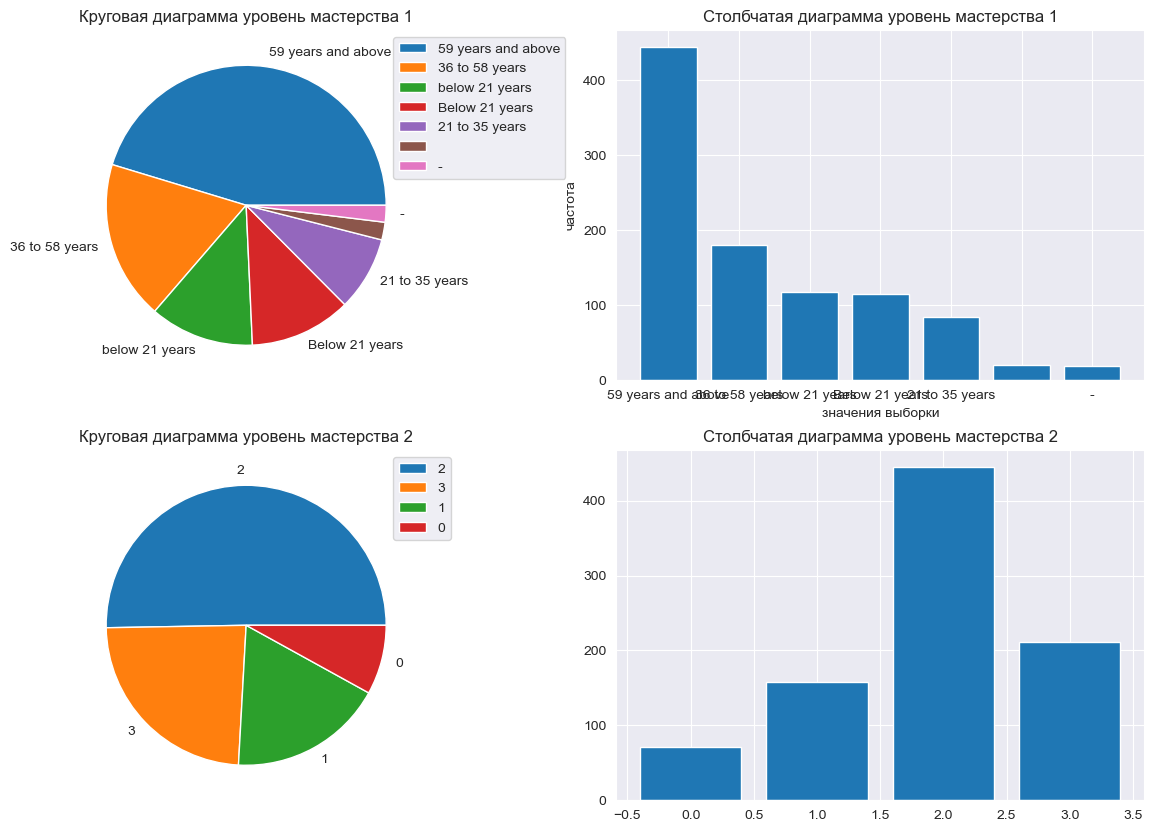

In [79]:
compare_category_graf(data, frame, AGE, AGE, "уровень мастерства")

In [80]:
data.loc[data[NUM_3]=='-', NUM_3] = float('nan')
data.loc[data[NUM_3]=='', NUM_3] = float('nan')
data.loc[data[NUM_3]==' ', NUM_3] = float('nan')
data[NUM_3] = data[NUM_3].fillna(np.NaN)

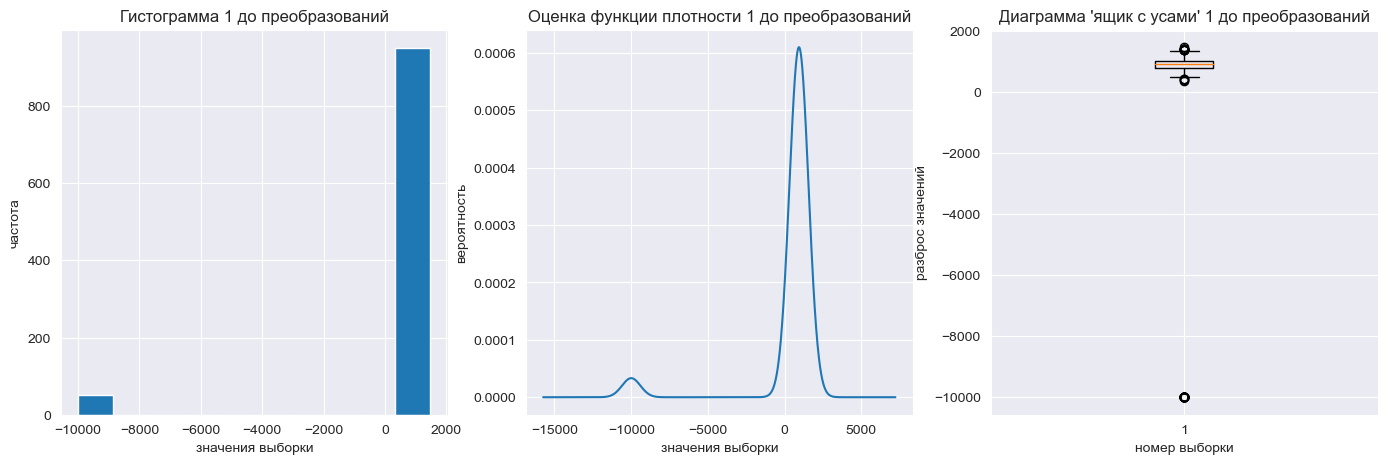

In [81]:
build_numeric_graph(data, NUM_1, "1 до преобразований")

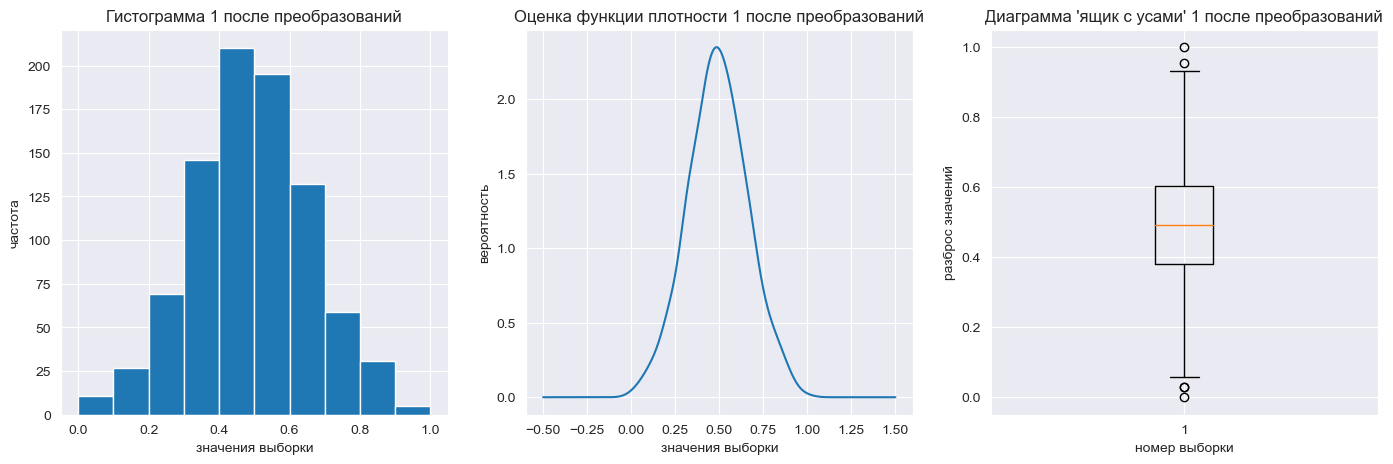

In [82]:
build_numeric_graph(frame, "num_1_scaled", "1 после преобразований")

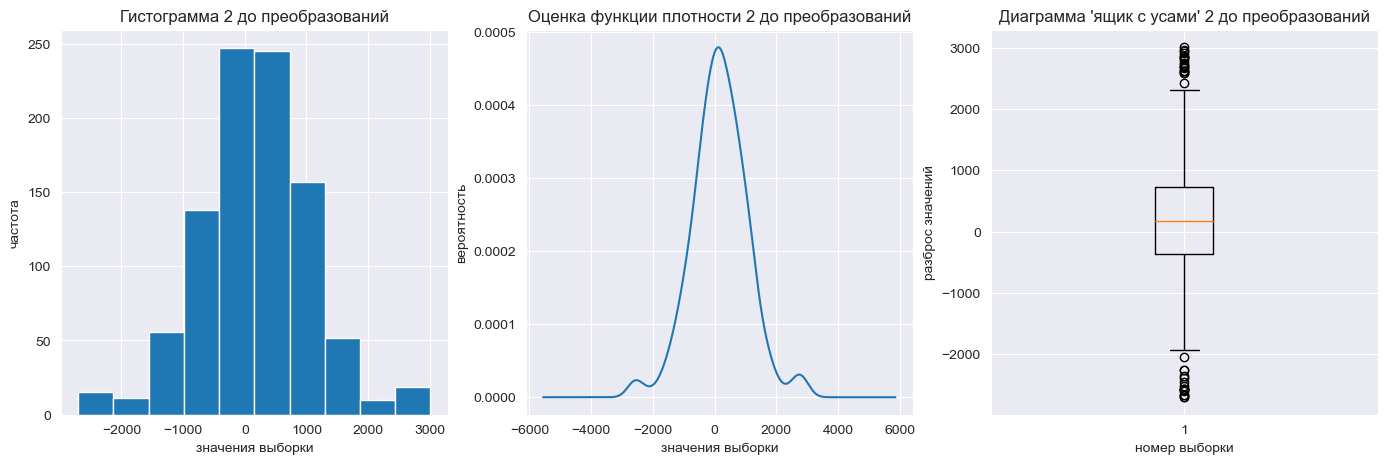

In [83]:
build_numeric_graph(data, NUM_2, "2 до преобразований")

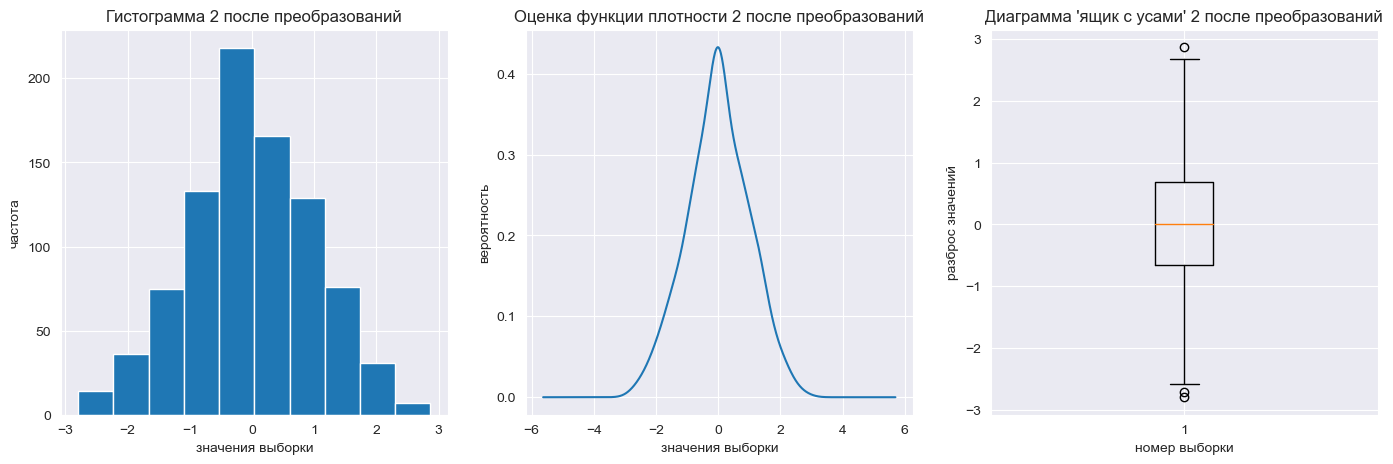

In [84]:
build_numeric_graph(frame, "num_2_scaled", "2 после преобразований")

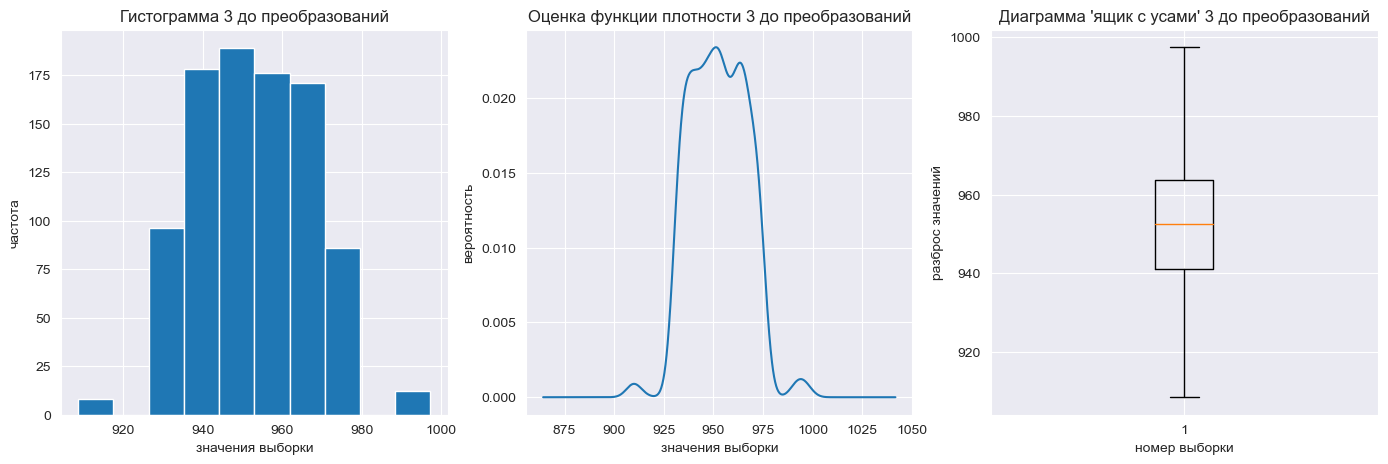

In [85]:
build_numeric_graph(data, NUM_3, "3 до преобразований")

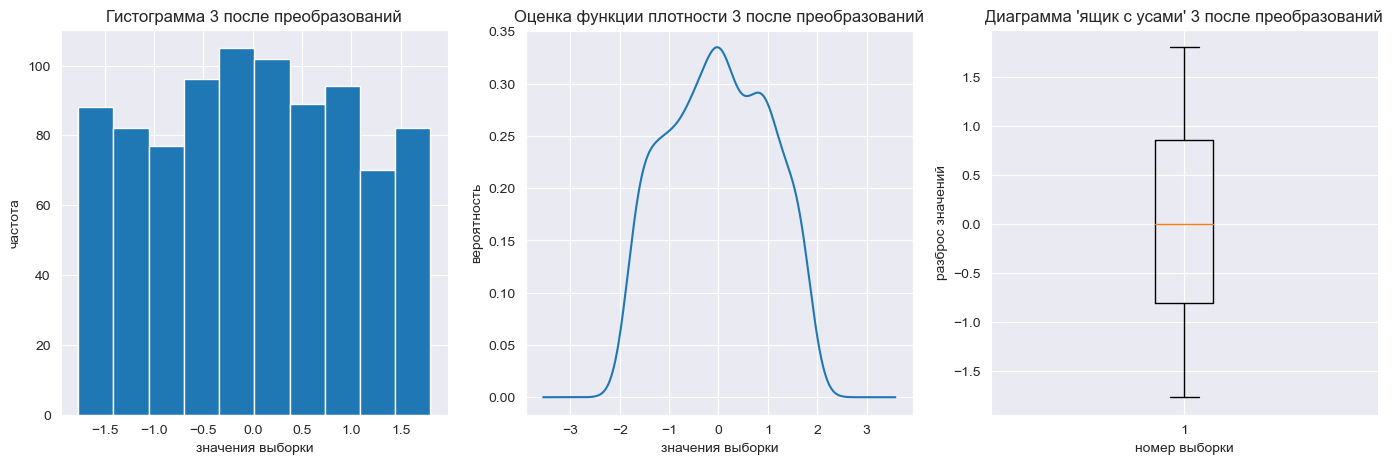

In [86]:
build_numeric_graph(frame, "num_3_scaled", "3 после преобразований")